<a href="https://colab.research.google.com/github/NA0724/StockPricePrediction_LSTM/blob/main/Stock_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [ ]:
#Description: This program uses Artificial Recurrent Neural Networks called Long Short Term Memory(LSTM) to predict the closing stock price 
#import libraries
import math
import pandas_datareader as pdr
import numpy as nmp
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plotGraph
#plot.style.use()

In [ ]:
#get the stock data set for Mercedes Benz share
df=pdr.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2020-12-31')
#show the data
df.filter(items=['Open','Close'])

,Open,Close
Date,,
2010-01-04,7.622500,7.643214
2010-01-05,7.664286,7.656429
2010-01-06,7.656429,7.534643
2010-01-07,7.562500,7.520714
2010-01-08,7.510714,7.570714
...,...,...
2020-12-24,131.320007,131.970001
2020-12-28,133.990005,136.690002
2020-12-29,138.050003,134.869995


In [ ]:
#visalize the closing price
plotGraph.figure(figsize=(20,10))
plotGraph.title('Closing price of Apple from 2010-2020', fontsize=20)
plotGraph.plot(df['Close'])
plotGraph.ylabel('Close Price [USD]', fontsize=18)
plotGraph.xlabel('Date', fontsize=18)
plotGraph.show()

In [ ]:
#Create a new data set with the closing price column
data = df.filter(['Close'])
#Convert the data set into a numpy array
dataset = data.values
#get the number of rows to train the model on( 80% of the data as training set)
training_data_length = math.ceil( len(dataset)*.8 )
#Print the length of the training set
training_data_length

2216

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
print('Scaled Data[Close]')
for i in scaled_data:
 for j in i:
  print(str(j))

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_length, :]
#Split data into x (independent variables or features) and y( dependent variables or features) sets
x_train = []
y_train = []

for i in range(100, len(train_data)):
  #first 100 values in x_train and 61st value in y_train(the value to be predicted)
  x_train.append(train_data[i-100:i, 0])
  y_train.append(train_data[i, 0])
  if i<=100:
    print(x_train)
    print()
    print(y_train)
    print()

In [ ]:
#Convert x_train and y_train into numpy array
x_train, y_train = nmp.array(x_train), nmp.array(y_train)

In [ ]:
#Reshape the data
x_train = nmp.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1955, 100, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
#create the test data set
#create an array containing scaled values  from index 1955 to 2055
test_data = scaled_data[training_data_length - 100:, :]
#create data sets x_test_set and y_test_set
x_test_set = []
y_test_set = dataset[training_data_length: , :]
for i in range(100, len(test_data)):
  x_test_set.append(test_data[i-100:i, 0])


In [ ]:
#Convert the data to a numpy array
x_test_set = nmp.array(x_test_set)


In [ ]:
#Reshape the data 
x_test_set = nmp.reshape(x_test_set, (x_test_set.shape[0], x_test_set.shape[1], 1))

In [ ]:
#get the models predicted price values
predictions = model.predict(x_test_set)
predictions = scaler.inverse_transform(predictions)
predictions

In [ ]:
#get the RMSE score
rmse = nmp.sqrt(nmp.mean(((predictions - y_test_set)**2)))
rmse

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


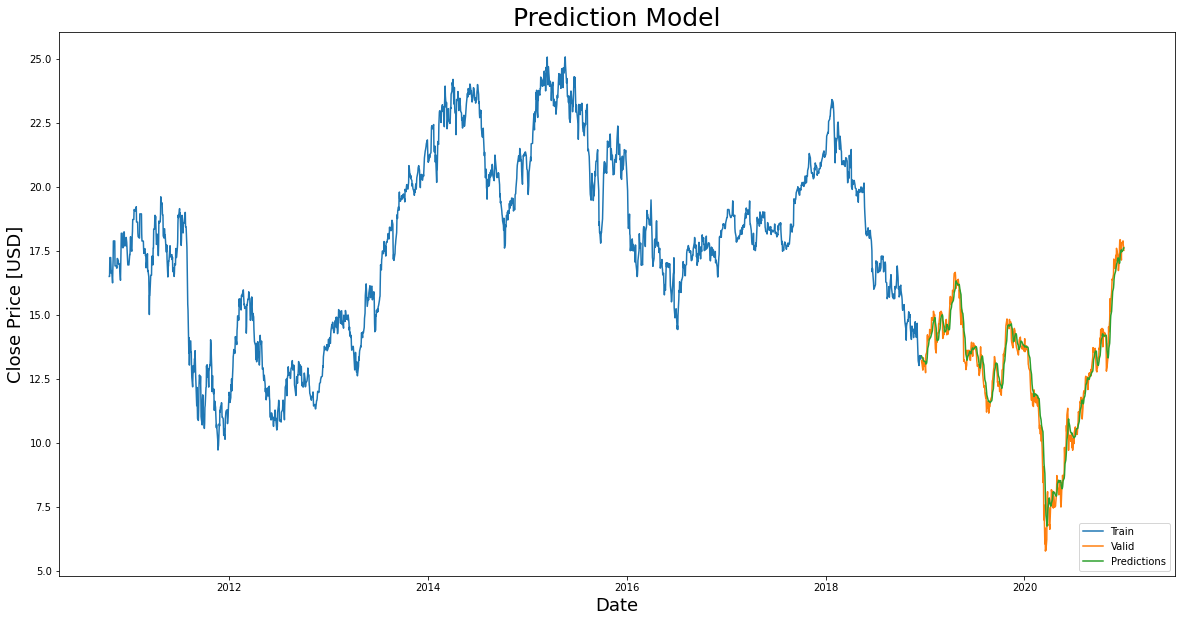

In [ ]:
#plot the data
train = data[:training_data_length]
valid = data[training_data_length: ]
valid['Predictions']= predictions
plotGraph.figure(figsize=(20,10))
plotGraph.title('Prediction Model', fontsize=25)
plotGraph.ylabel('Close Price [USD]', fontsize=18)
plotGraph.xlabel('Date', fontsize=18)
plotGraph.plot(train['Close'])
plotGraph.plot(valid[['Close', 'Predictions']])
plotGraph.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plotGraph.show()

In [ ]:
#Show the actual and predicted prices
valid

In [ ]:
#Get the predicted price for next day
quote = pdr.DataReader('DMLRY', data_source='yahoo', start='2010-01-01', end='2020-12-30')
#create new dataeframe 
new_df= quote.filter(['Close'])
#get the last 60 day closing price values and convert the daataframe to array
last_60 = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days = scaler.transform(last_60)
#create an empty list
x_test=[]
#append the last 60 days
x_test.append(last_60_days)
#convert the x_test data set to numpy arraya
x_test = nmp.array(x_test)
#reshape the data
x_test = nmp.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price) 

[[17.617662]]


In [ ]:
#quote1 = pdr.DataReader('AAPL', data_source='yahoo', start='2021-01-01', end='2021-01-01')
#print(quote1['Close'])
quote1=pdr.DataReader('DMLRY', data_source='yahoo', start='2020-12-31', end='2020-12-31')
print(quote1['Close'])

Date
2020-12-31    17.52
Name: Close, dtype: float64
